# Package

In [9]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.callbacks import ModelCheckpoint, CSVLogger,EarlyStopping
import matplotlib.pyplot as plt

In [10]:
np.random.seed(42)

## Model build-in

In [11]:
W=128
H=128
batch=32
model_path=os.path.join("/kaggle/working/file","model2.h5")
csv_path=os.path.join("/kaggle/working/file","model2.csv")
json_path=os.path.join("/kaggle/working/file","model2.json")
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)
create_dir("files")


In [12]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(H, W, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Image Preprocess in keras

In [13]:
train_preprocess = ImageDataGenerator(rescale=None,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
valid_preprocess= ImageDataGenerator(rescale=1. / 255)

# Load Dataset

In [14]:
traing_dataset = train_preprocess.flow_from_directory('dataset1/Training',target_size=(W, H),batch_size=batch, class_mode='categorical')

valid_dataset = train_preprocess.flow_from_directory('dataset1/Testing',target_size=(W, H), batch_size=batch,class_mode='categorical')


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [15]:
lable1 = traing_dataset.class_indices
print(lable1)


{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


In [16]:
callback=[
     ModelCheckpoint(model_path, verbose=1, save_best_only=True),
     CSVLogger(csv_path),
     EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=False),   
]

In [18]:
model.fit(traing_dataset, epochs=75, validation_data=valid_dataset,callbacks=callback,
        verbose=1)

Epoch 1/75
179/179 [==============================] - ETA: 0s - loss: 0.7746 - accuracy: 0.7036
Epoch 1: val_loss improved from inf to 1.01675, saving model to /kaggle/working/file/model2.h5
179/179 [==============================] - 75s 420ms/step - loss: 0.7746 - accuracy: 0.7036 - val_loss: 1.0168 - val_accuracy: 0.6110
Epoch 2/75


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


179/179 [==============================] - ETA: 0s - loss: 0.5055 - accuracy: 0.8078
Epoch 2: val_loss improved from 1.01675 to 0.97616, saving model to /kaggle/working/file/model2.h5
179/179 [==============================] - 40s 223ms/step - loss: 0.5055 - accuracy: 0.8078 - val_loss: 0.9762 - val_accuracy: 0.7025
Epoch 3/75
179/179 [==============================] - ETA: 0s - loss: 0.3970 - accuracy: 0.8529
Epoch 3: val_loss improved from 0.97616 to 0.87908, saving model to /kaggle/working/file/model2.h5
179/179 [==============================] - 40s 223ms/step - loss: 0.3970 - accuracy: 0.8529 - val_loss: 0.8791 - val_accuracy: 0.6064
Epoch 4/75
179/179 [==============================] - ETA: 0s - loss: 0.3463 - accuracy: 0.8708
Epoch 4: val_loss did not improve from 0.87908
179/179 [==============================] - 40s 225ms/step - loss: 0.3463 - accuracy: 0.8708 - val_loss: 1.3204 - val_accuracy: 0.6423
Epoch 5/75
179/179 [==============================] - ETA: 0s - loss: 0.2964

In [20]:
json = model.to_json()

with open(json_path, 'w') as json_files:
    json_files.write(json)
model.save_weights(model_path)
print("train successfully")

train successfully


In [21]:
import pandas as pd
metrics = pd.read_csv("file/model2.csv")
metrics.head(2)

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.703606,0.774592,0.610984,1.016752
1,1,0.807773,0.505479,0.702517,0.976160


<Axes: >

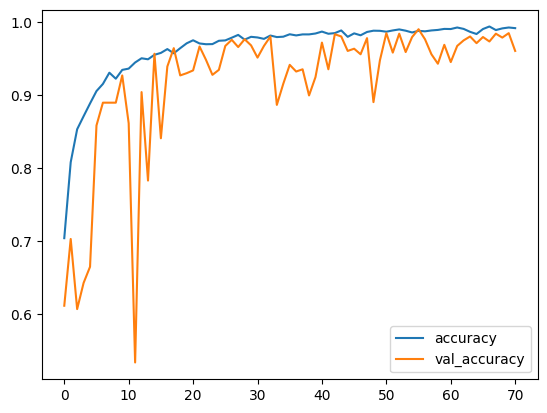

In [22]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

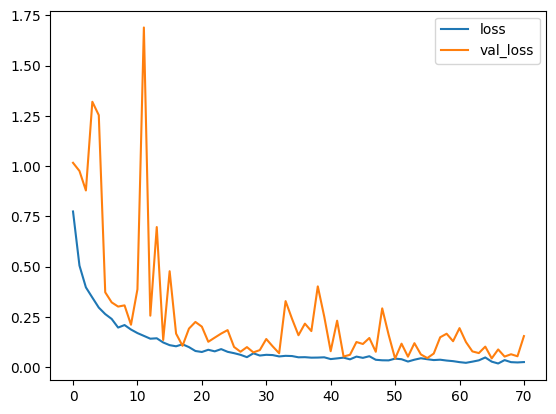

In [23]:
metrics[['loss','val_loss']].plot()